In [1]:
## Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture


import pickle as pkl

## Importing utils
from utils import generate_pure_random, generate_constrained_random

## Autoreload
%load_ext autoreload
%autoreload 2

## Imporitng random package
from experiment import Random

## Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_iris()
X = data.data
y = data.target

In [4]:
print X.shape
print y.shape

(150, 4)
(150,)


In [5]:
X = X[(y == 0) | (y == 1), :]
y = y[(y == 0) | (y == 1)]
print X.shape
print y.shape

(100, 4)
(100,)


In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC()

In [9]:
svc.fit(X, y)
print svc.score(X, y)

1.0


In [10]:
X_random = generate_constrained_random(X, data.feature_names, data_size=1000)
print X_random.shape

(1000, 4)


In [11]:
y_random = svc.predict(X_random)
print y_random.shape

(1000,)


In [12]:
Counter(y_random)

Counter({0: 344, 1: 656})

In [13]:
plt.scatter(X_random.values[:, 0], X_random.values[:, 1], c=y_random, cmap=plt.cm.Spectral)

In [14]:
model = SVC()
model.fit(X_random, y_random)
model.score(X, y)

1.0

In [15]:
## Make Moons
data = datasets.make_moons()
X, y = data
feature_names = ['feature1', 'feature2']
print X.shape, y.shape
svc = SVC()
svc.fit(X, y)
print svc.score(X, y)
X_random = generate_constrained_random(X, feature_names, data_size=1000)
print X_random.shape
model = SVC()
model.fit(X_random, svc.predict(X_random))
print model.score(X, y)

(100, 2) (100,)
0.98
(1000, 2)
0.96


In [16]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print X.shape, y.shape
svc = SVC()
svc.fit(X, y)
print svc.score(X, y)
X_random = generate_constrained_random(X, feature_names, data_size=1000)
print X_random.shape
model = SVC()
y_random = svc.predict(X_random)
print Counter(y_random)
# model.fit(X_random, y_random)
# print model.score(X, y)

(569, 30) (569,)
1.0
(1000, 30)
Counter({1: 1000})


In [17]:
data = pd.read_csv('../data/heart.csv')
data['famhist'] = data['famhist'].map({"Absent": 0, "Present":1})
y = data.pop("chd").values
X = data.values
feature_names = data.columns
print X.shape, y.shape
svc = SVC()
svc.fit(X, y)
print svc.score(X, y)
X_random = generate_constrained_random(X, feature_names, data_size=1000)
print X_random.shape
model = SVC()
y_random = svc.predict(X_random)
print Counter(y_random)
# model.fit(X_random, y_random)
# print model.score(X, y)

(462, 9) (462,)
1.0
(1000, 9)
Counter({0: 1000})


In [18]:
with open('../../../Dataset/Adult/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Adult/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values[0:1500,:]
y = label[0:1500]
print X.shape, y.shape
svc = SVC()
svc.fit(X, y)
print svc.score(X, y)
X_random = generate_constrained_random(X, feature_names, data_size=1000)
print X_random.shape
model = SVC()
y_random = svc.predict(X_random)
print Counter(y_random)
# model.fit(X_random, y_random)
# print model.score(X, y)

(1500, 107) (1500,)
0.995333333333
(1000, 107)
Counter({0: 1000})


In [19]:
## Bridges Dataset
with open('../../../Dataset/Bridges/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Bridges/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
svc = SVC()
svc.fit(X, y)
print svc.score(X, y)
X_random = generate_constrained_random(X, feature_names, data_size=1000)
print X_random.shape
model = SVC()
y_random = svc.predict(X_random)
print Counter(y_random)
# model.fit(X_random, y_random)
# print model.score(X, y)

(106, 29) (106,)
0.990566037736
(1000, 29)
Counter({1: 1000})


In [21]:
## Mushroom Dataset
with open('../../../Dataset/Mushroom/train.pkl', 'rb') as fp:
    data = pkl.load(fp)
with open('../../../Dataset/Mushroom/label.pkl', 'rb') as fp:
    label = pkl.load(fp)
feature_names = data.columns
X = data.values
y = label
print X.shape, y.shape
svc = SVC()
svc.fit(X, y)
print svc.score(X, y)
X_random = generate_constrained_random(X, feature_names, data_size=1000)
print X_random.shape
model = SVC()
y_random = svc.predict(X_random)
print Counter(y_random)
model.fit(X_random, y_random)
print model.score(X, y)

(8124, 112) (8124,)
0.999015263417
(1000, 112)
Counter({1: 741, 0: 259})
0.610782865583


In [42]:
def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error += 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        
    return w, errors

In [43]:
w, errors = svm_sgd_plot(X, y)

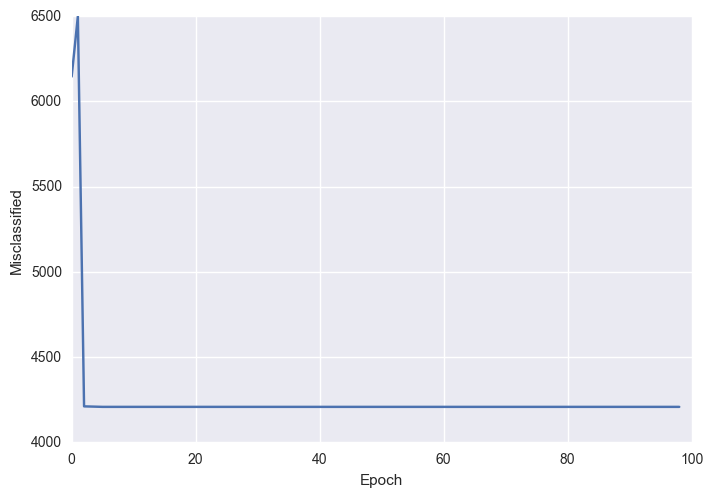

In [44]:
#lets plot the rate of classification errors during training for our SVM
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Misclassified')
plt.show()

In [45]:
np.dot(X_random, w)

array([ 3932.04771459,  3262.57495   ,  4236.86130385,  3672.72801758,
        2735.46449743,  3918.36830951,  3573.67252118,  4340.18487673,
        3865.52421167,  3748.54641954,  2633.91256987,  3283.76884901,
        4039.39232029,  2166.11413816,  5206.47581853,  4698.28525188,
        2524.74346562,  3439.28786601,  4692.22112523,  2097.71783171,
        3005.51260814,  3299.78309942,  4367.96920673,  3471.68825113,
        3393.01068981,  2997.78998515,  4841.7510163 ,  3675.48300522,
        3585.90671123,  2629.30690714,  4375.93972829,  4522.85924206,
        4598.02407766,  4285.81822701,  3784.16386132,  3981.91685112,
        3345.92525283,  4276.61503823,  4068.98595375,  2820.21000962,
        4898.17718859,  3528.5921763 ,  3554.77884325,  2935.21362159,
        5444.22504572,  3380.33872677,  4746.77247047,  4806.56512632,
        3876.81782202,  3902.18696225,  4400.65650968,  5469.37693442,
        2944.31385648,  3777.61588789,  2874.75060167,  4799.27810017,
      